# Metodo ARIMA

In [1]:
#importar librerias
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression

In [2]:
original = pd.read_excel('Data_3.xlsx')
df = original.copy()
df.head()

,Día,Ventas
0,2018-01-04,22.91
1,2018-01-05,20.63
2,2018-01-06,28.85
3,2018-01-07,22.97
4,2018-01-08,23.39


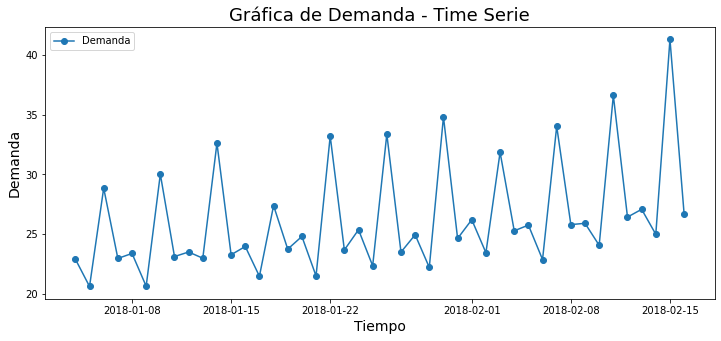

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(12,5))
plt.plot(df['Día'], df['Ventas'], 'o-', label = 'Demanda')
plt.xlabel("Tiempo", fontsize = 14)
plt.ylabel("Demanda", fontsize = 14)
plt.title("Gráfica de Demanda - Time Serie", fontsize = 18)
plt.legend(loc='best')
plt.show()

## Análisis de AutoCorrelación

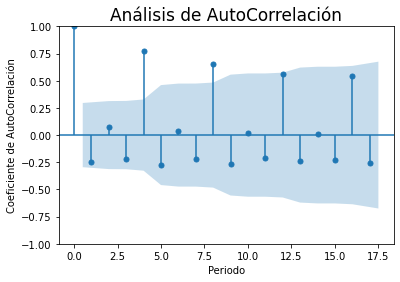

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Ventas'])
plt.title("Análisis de AutoCorrelación", fontsize = 17)
plt.xlabel('Periodo')
plt.ylabel("Coeficiente de AutoCorrelación")
plt.show()

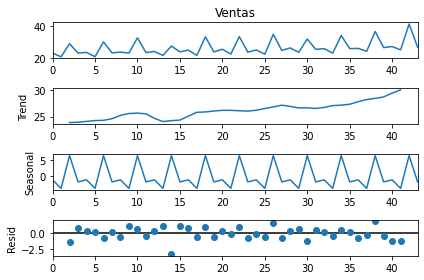

In [5]:
#Grafica la variabiliadd de los datos
#Tendecia
#Estacionalidad
#Residuos
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Ventas'], model = 'additive', period = 4)
result.plot()
plt.show()

# Box Jenkins - ARIMA

## Transformar la seria a estacionala - Diferenciar

In [6]:
#Estacionalidad de 4 periodos
#shift es para correr los datos hasta el 4º
df['Diferencia'] = df['Ventas'] - df['Ventas'].shift(4)
df.head(6)

,Día,Ventas,Diferencia
0,2018-01-04,22.91,NaN
1,2018-01-05,20.63,NaN
2,2018-01-06,28.85,NaN
3,2018-01-07,22.97,NaN
4,2018-01-08,23.39,0.48
5,2018-01-09,20.65,0.02


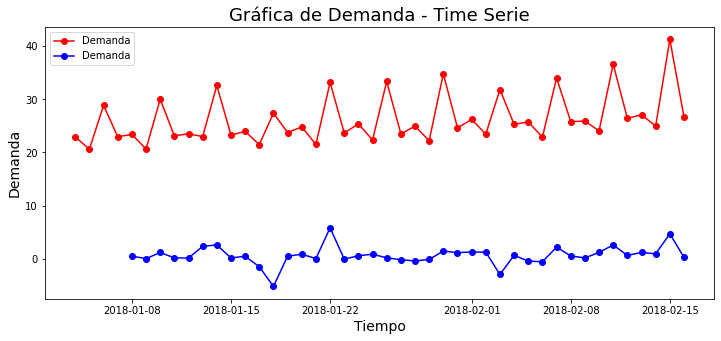

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(12,5))
#Demanda normal
plt.plot(df['Día'], df['Ventas'], 'o-', color = 'red', label = 'Demanda')
#Demanda 4 periodos
plt.plot(df['Día'], df['Diferencia'], 'o-', color = 'blue',label = 'Demanda')
plt.xlabel("Tiempo", fontsize = 14)
plt.ylabel("Demanda", fontsize = 14)
plt.title("Gráfica de Demanda - Time Serie", fontsize = 18)
plt.legend(loc='best')
plt.show()

## Seleccion de modelo ARIMA

In [8]:
data = df['Ventas'][4:]
data

4     23.39
5     20.65
6     30.02
7     23.13
8     23.51
9     22.99
10    32.61
11    23.28
12    23.97
13    21.48
14    27.39
15    23.75
16    24.81
17    21.51
18    33.20
19    23.68
20    25.37
21    22.36
22    33.36
23    23.50
24    24.95
25    22.22
26    34.81
27    24.64
28    26.21
29    23.45
30    31.85
31    25.28
32    25.76
33    22.88
34    34.02
35    25.80
36    25.91
37    24.07
38    36.60
39    26.43
40    27.08
41    24.99
42    41.29
43    26.69
Name: Ventas, dtype: float64

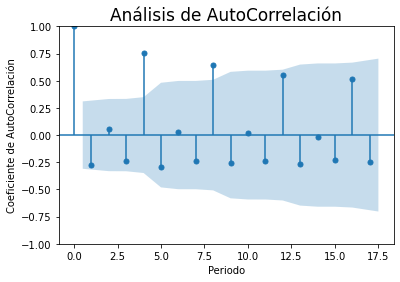

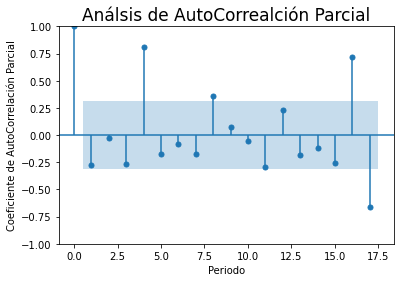

In [9]:
#La serie tiene tendencia?
#Si tiene tendencia, transformar para convertir a seria estacionaria

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_acf(data)
plt.title("Análisis de AutoCorrelación", fontsize = 17)
plt.xlabel('Periodo')
plt.ylabel("Coeficiente de AutoCorrelación")

plot_pacf(data)
plt.title('Análsis de AutoCorrealción Parcial', fontsize = 17)
plt.xlabel('Periodo')
plt.ylabel('Coeficiente de AutoCorrelación Parcial')

plt.show()


In [10]:
# Modelo completo S-ARIMA. Dado que ambos gráficos que presentan componentes similares

# Definir los parametros
# p=1 Autoregresivo AR(0,1)
# q=1 Media Movil MA(0,1)
# d=1 Diferenciaciones I(0,1) - para volver la seria estacionaría

In [11]:
p = q = d = range(0,2)

import itertools

#Generar lista de combinaciones (p,d,q)
pdq = list(itertools.product(p,d,q))

#Entre los ciclos por Estacionalidad (P,D,Q)
estacional_pdq = [(x[0],x[1],x[2],4) for x in list(itertools.product(p,d,q))]

In [12]:
#ARIMA
sol = list()

for param in pdq:
    for param_estacion in estacional_pdq:

        try:
            mod = sm.tsa.statespace.SARIMAX(data, order = param, seasonal_order=param_estacion, enforce_stationarity=False, enforce_invertibility=False)
            result = mod.fit()

            #score AIC
            print('ARIMA {}x{}4-AIC:{}'.format(param,param_estacion,result.aic))
            sol.append((param,param_estacion,result.aic))
        except:
            print('Error')
            continue


ARIMA (0, 0, 0)x(0, 0, 0, 4)4-AIC:369.6395636494583
ARIMA (0, 0, 0)x(0, 0, 1, 4)4-AIC:334.9323257646829
ARIMA (0, 0, 0)x(0, 1, 0, 4)4-AIC:147.75374130257183
ARIMA (0, 0, 0)x(0, 1, 1, 4)4-AIC:130.9288518789326
ARIMA (0, 0, 0)x(1, 0, 0, 4)4-AIC:148.518131164071
ARIMA (0, 0, 0)x(1, 0, 1, 4)4-AIC:135.36860661622416
ARIMA (0, 0, 0)x(1, 1, 0, 4)4-AIC:133.05407799523167
ARIMA (0, 0, 0)x(1, 1, 1, 4)4-AIC:121.95149343985669
ARIMA (0, 0, 1)x(0, 0, 0, 4)4-AIC:333.5268264385356
ARIMA (0, 0, 1)x(0, 0, 1, 4)4-AIC:302.2532086676124
ARIMA (0, 0, 1)x(0, 1, 0, 4)4-AIC:144.13597635214438
ARIMA (0, 0, 1)x(0, 1, 1, 4)4-AIC:128.44931705774513
ARIMA (0, 0, 1)x(1, 0, 0, 4)4-AIC:150.72555369857247
ARIMA (0, 0, 1)x(1, 0, 1, 4)4-AIC:135.10128894519923
ARIMA (0, 0, 1)x(1, 1, 0, 4)4-AIC:134.1596493493739
ARIMA (0, 0, 1)x(1, 1, 1, 4)4-AIC:120.0845214083665
ARIMA (0, 1, 0)x(0, 0, 0, 4)4-AIC:263.7641339718593
ARIMA (0, 1, 0)x(0, 0, 1, 4)4-AIC:218.74042915013314
ARIMA (0, 1, 0)x(0, 1, 0, 4)4-AIC:160.69159113240866
ARI

In [13]:
best = min( (n for n in sol), key = lambda n: n[2])
best

((0, 1, 1), (1, 1, 1, 4), 111.49134917258874)

In [14]:
#p=0, d=1, q=1
#P=0, D=1, q=1, S=4

mod = sm.tsa.statespace.SARIMAX(data, order = (0,1,1), seasonal_order=(0,1,1,4), enforce_stationarity=False, enforce_invertibility=False)

result = mod.fit()
print(result.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            Ventas   No. Observations:                   40
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 -53.667
Date:                           Fri, 22 Oct 2021   AIC                            113.333
Time:                                   09:47:24   BIC                            117.435
Sample:                                        0   HQIC                           114.618
                                            - 40                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8868      0.297     -2.985      0.003      -1.469      -0.305
ma.S.L4       -0.4803      0.208     -2.308

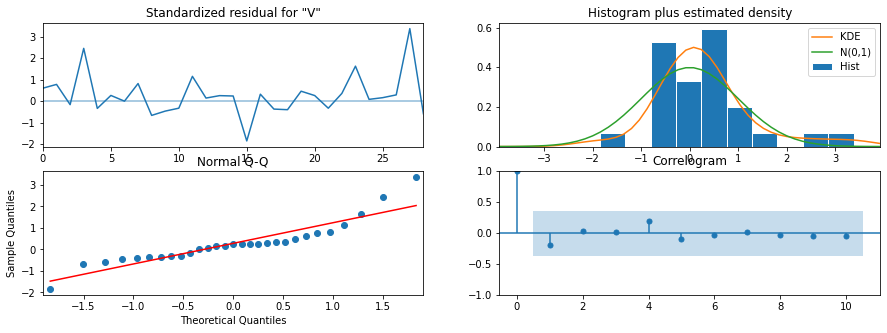

In [15]:
result.plot_diagnostics(figsize=(15,5))
plt.show()

In [16]:
#p=1, d=1, q=1
#P=1, D=1, q=1, S=4

#mod = sm.tsa.statespace.SARIMAX(data, order = (1,1,1), seasonal_order=(1,1,1,4), enforce_stationarity=False, enforce_invertibility=False)

#result = mod.fit()
#print(result.summary())

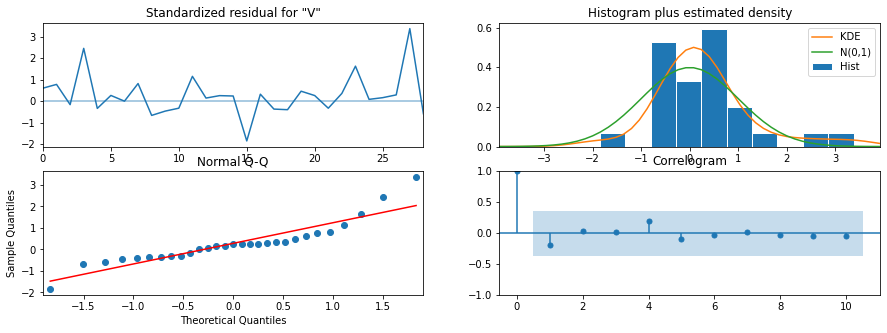

In [17]:
result.plot_diagnostics(figsize=(15,5))
plt.show()

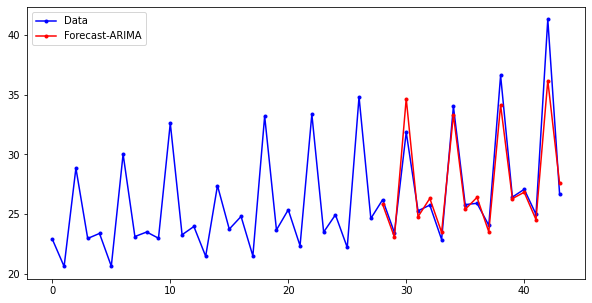

In [18]:
pred=result.predict(24)

plt.figure(figsize=(10,5))
plt.plot(df['Ventas'],'.-',color='blue',label='Data')
plt.plot(pred,'.-',color='red',label='Forecast-ARIMA')
plt.legend(loc='best')
plt.show()

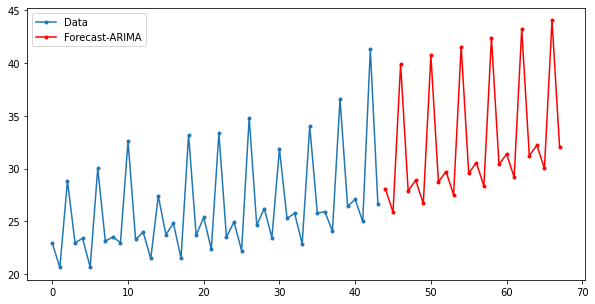

In [19]:
forescating=result.forecast(24)

plt.figure(figsize=(10,5))
plt.plot(df['Ventas'],'.-',label='Data')
plt.plot(forescating,'.-',color='red',label='Forecast-ARIMA')
plt.legend(loc='best')
plt.show()

In [20]:
result.fittedvalues

4      0.000000
5     23.390000
6     20.650003
7     30.019990
8     38.723340
9     20.770025
10    32.359981
11    25.595889
12    25.185595
13    23.985086
14    32.572212
15    22.746343
16    23.543335
17    21.771577
18    29.287068
19    24.209920
20    24.953869
21    22.358770
22    32.090366
23    24.519223
24    25.658781
25    22.719735
26    33.044633
27    24.419534
28    25.817117
29    23.083384
30    34.663119
31    24.786263
32    26.318851
33    23.481501
34    33.316514
35    25.402921
36    26.406159
37    23.521116
38    34.131243
39    26.301802
40    26.833402
41    24.547154
42    36.175201
43    27.575356
dtype: float64